# Introduction

In this notebook we analyse in more detail the *distribution in time and number of episodes needed* for our baseline dqn-agent to succeed in the **Banana Collector** environment. This is the first project: *Navigation* of **Deep Reinforcement Learning for Enterprise** Course in *Udacity*.

Success in the environment is defined as achieving an average above 13 points over 100 consecutive episodes.

## 0 - Importing Packages

Importing all required packages.

In [3]:
from unityagents import UnityEnvironment
import random
import torch
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from training_dqn_agent import dqn

## 1 - Initialising Environment

Initialising Unity environment to analyse.

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 2 - Definiting Hyperparameters

Defining a dictionary with all hyperparameters used as inputs in the learning model.

In [4]:
dic = {'n_episodes': 2000,  #maximum number of episodes to learn from
       'max_t': 1000,       #maximum time steps per episode
       'eps_start': 1.0,    #initial epsilon value 
       'eps_end': 0.01,     #final epsilon value
       'eps_decay':0.995,   #decay rate for epsilon per episode
       'fc1_units':64,      #number of units for the first deep fully connected network layer
       'fc2_units':64,      #number of units for the second deep fully connected network layer
       'buffer_size': int(1e5), #size of the memory
       'batch_size': 64,     #size of the number of examples fed at each learning step
       'gamma':0.99,         #discounting rate of rewards
       'tau': 1e-3,          #rate of soft update between target and local network model
       'lr': 1e-4,           #learning rate for the network parameters
       'update_every': 4     #how often between action steps trigger learn step
      }

## 3 - Training model

### 3.1 - Preliminaries

Defining two useful functions to transform the scores an times results dictionaries into dataframes.

In [5]:
def maxlen(dic):
    l = 0
    for e in dic.values():
        if len(e) > l:
            l = len(e)
    return l

In [6]:
def dic_fix(dic):
    dicF = {}
    ml = maxlen(dic)
    for i , e in enumerate(dic.values()):
        new = [None] * (ml - len(e))
        dicF[i] = e + new
    return dicF

Initialising dictionaries to collect results.

In [7]:
scores_dic = {}
times_dic = {}

### 3.2 - Training Loop

Looping through 50 training sessions and collecting scores and times data.

In [8]:
for i in range(50):
    scores, times = dqn(env, dic)
    scores_dic[i] = scores
    times_dic[i] = times

Episode 100	Average Score: 0.40	Time Split: 79.44			 
Episode 200	Average Score: 2.15	Time Split: 74.72			 
Episode 300	Average Score: 6.74	Time Split: 77.54			 
Episode 400	Average Score: 8.96	Time Split: 75.13			 
Episode 500	Average Score: 11.92	Time Split: 75.30			 
Episode 536	Average Score: 13.02	Time Elapsed: 409.03
Environment solved in 436 episodes!	Average Score: 13.02	Time Elapsed: 409.03
Episode 100	Average Score: 0.99	Time Split: 74.80			 
Episode 200	Average Score: 4.05	Time Split: 74.52			 
Episode 300	Average Score: 7.40	Time Split: 74.02			 
Episode 400	Average Score: 9.41	Time Split: 74.65			 
Episode 500	Average Score: 12.11	Time Split: 74.65			 
Episode 535	Average Score: 13.07	Time Elapsed: 398.86
Environment solved in 435 episodes!	Average Score: 13.07	Time Elapsed: 398.86
Episode 100	Average Score: 0.71	Time Split: 72.18			 
Episode 200	Average Score: 3.78	Time Split: 73.68			 
Episode 300	Average Score: 8.53	Time Split: 76.10			 
Episode 400	Average Score: 9.32	

Episode 300	Average Score: 6.48	Time Split: 76.99			 
Episode 400	Average Score: 9.48	Time Split: 77.74			 
Episode 500	Average Score: 11.88	Time Split: 77.58			 
Episode 600	Average Score: 12.97	Time Split: 78.30			 
Episode 609	Average Score: 13.04	Time Elapsed: 468.96
Environment solved in 509 episodes!	Average Score: 13.04	Time Elapsed: 468.96
Episode 100	Average Score: 1.03	Time Split: 74.95			 
Episode 200	Average Score: 4.35	Time Split: 76.11			 
Episode 300	Average Score: 8.67	Time Split: 76.94			 
Episode 400	Average Score: 10.00	Time Split: 77.34			 
Episode 500	Average Score: 12.53	Time Split: 77.43			 
Episode 527	Average Score: 13.00	Time Elapsed: 403.67
Environment solved in 427 episodes!	Average Score: 13.00	Time Elapsed: 403.67
Episode 100	Average Score: 0.78	Time Split: 74.97			 
Episode 200	Average Score: 4.68	Time Split: 76.29			 
Episode 300	Average Score: 7.37	Time Split: 76.71			 
Episode 400	Average Score: 9.58	Time Split: 77.31			 
Episode 500	Average Score: 11.

### 3.3 - Storing data

Making dictionaries all same size.

In [9]:
scores_dic_fix = dic_fix(scores_dic)
times_dic_fix = dic_fix(times_dic)

Passing them on to a DataFrame structure.

In [10]:
scores_df = pd.DataFrame(scores_dic_fix)
times_df = pd.DataFrame(times_dic_fix)

Storing the DataFrames into csv files for analysis in the next section.

In [11]:
scores_df.to_csv('scores_baseline_analysis.csv')
times_df.to_csv('times_baseline_analysis.csv')

In [ ]:
env.close()

## 4 - Analysing the data

### 4.1 - Loading the data

In [11]:
scores_df = pd.read_csv('scores_baseline_analysis.csv', index_col=0)
times_df = pd.read_csv('times_baseline_analysis.csv', index_col=0)

### 4.2 - Analysing Time

In this section we analyse the distribution of amount of time taken to train the model to succeed.

In [14]:
total_times = times_df.sum()

In [16]:
total_times.describe()

count     50.000000
mean     403.394878
std       22.431732
min      345.016592
25%      390.743404
50%      400.672497
75%      412.498806
max      448.068782
dtype: float64

Both mean and median sit around **400 seconds** for the baseline model to succeed.

The distribution is relatively normal *(only 50 samples)* to compare from and __*standard deviation* is around *25 seconds*__. *Maximum of 450 seconds* and *minimum* experienced *345 seconds*.

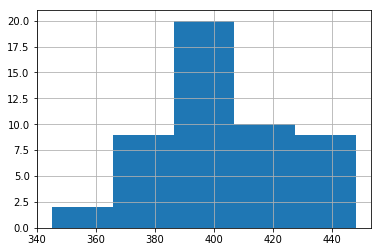

In [23]:
total_times.hist(bins=5)

### 4.2 - Analysing the rolling scores

In [24]:
rolling = scores_df.rolling(100).mean()

In [25]:
rolling_vol = scores_df.rolling(100).std()

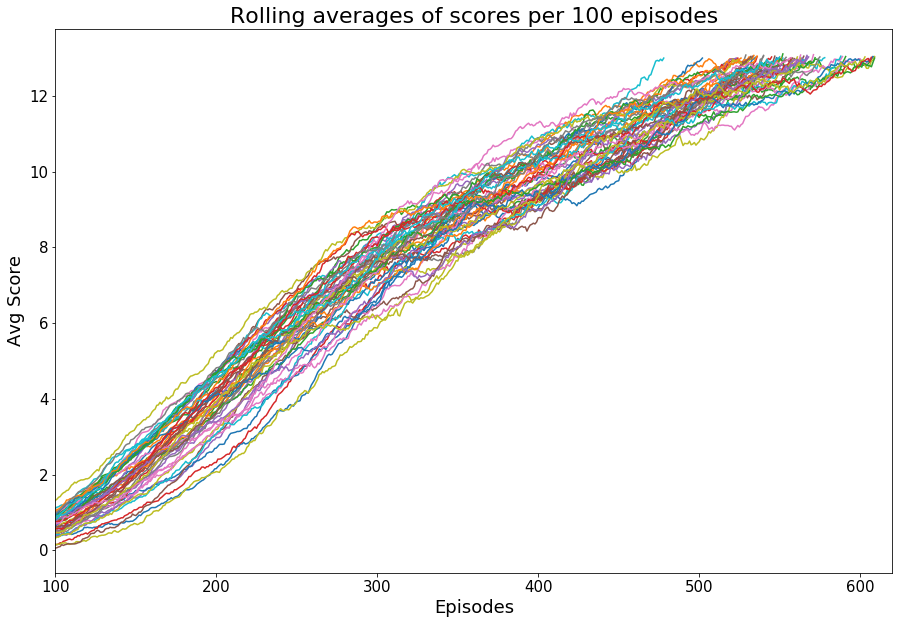

In [82]:
ax = rolling.plot(legend=None, xlim=(100,620), figsize=(15, 10), fontsize=15)
ax.set_xlabel("Episodes", fontsize=18)
ax.set_ylabel("Avg Score", fontsize=18)
ax.set_title("Rolling averages of scores per 100 episodes", fontsize=22)
ax.figure.savefig("RollAvgBase.png")


The rolling average score has a s-shaped dynamics, tightly banded between 2 points at 100 episodes and 4 points at 400 episodes.

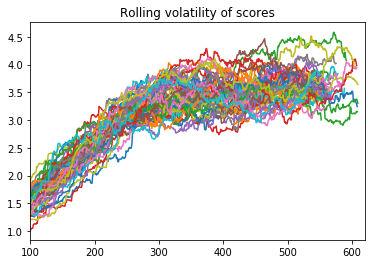

In [85]:
rolling_vol.plot(legend=None, xlim=(100,620), title="Rolling volatility of scores")

The rolling volatility of scores increases from 1.5 points at 100 episodes to a plateau of around 3.5 points has learning evolves and mean increases to 10 points at 400 episodes.

### 4.3 - Analysing total number of episodes

In this section we anlyse the total number of episodes required to achieve success in the environment.

In [86]:
total_episodes = scores_df.count() - 100

In [43]:
total_episodes.describe()

count     50.000000
mean     458.680000
std       29.037934
min      379.000000
25%      437.000000
50%      456.500000
75%      472.750000
max      510.000000
dtype: float64

Both mean and median sit around **460 episodes** for the baseline model to succeed. Mode slightly deslocated to the left at around 440-450 episodes.

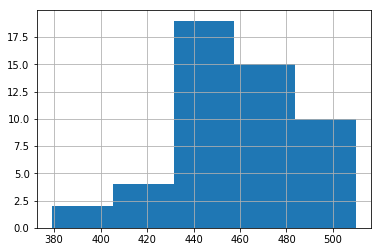

In [47]:
total_episodes.hist(bins=5)

In [48]:
total_episodes.skew()

0.028038531308835036

In [49]:
total_episodes.kurt()

0.16575246054116688

Distribution of total number of episodes has a *positive skew* and it has *slightly fatter tails* than a normal distribution.

With *30 episodes standard deviation*, on a set of 50 samples the test produced a maximum of 510 episodes and minimum of 380 required to succeed.